# A Framework for Leveraging LLMs for Scene Analysis and Cognitive Processing

## Setup

In [1]:
import os
HOME = os.getcwd()

os.chdir(HOME)
print(HOME)

/media/catarina/Windows/Users/cmore/Documents/GitHub/human_exploration_cleaned


In [2]:
import os
HOME = os.getcwd()


import torch

import numpy as np

from classes.ImageData import ImageData
from classes.LLM import LLM
from classes.SAM_Segmentation import SAM_Segmentation

import pandas as pd

from IPython.display import display, HTML

from utils.llm_utils import *
from utils.experiment_data import *

import utils.style as stl
from utils.experiment_utils import *

import matplotlib.pyplot as plt

from utils.prompts import *

import pickle

In [3]:

DATA_DIR = os.path.join(HOME, "data", "experiments")
IMAGE_DIR = os.path.join(HOME, "data", "images")
RESULTS_DIR = os.path.join(HOME, "outputs")

SAM_CONFIG = f"configs/sam2.1/sam2.1_hiera_l.yaml"
SAM_MODEL = f"{HOME}/checkpoints/sam2.1_hiera_large.pt"

print("HOME:", HOME)
print("DATA_DIR:", DATA_DIR)
print("IMAGE_DIR:", IMAGE_DIR)
print("SAM_CONFIG:", SAM_CONFIG)
print("SAM_MODEL:", SAM_MODEL)

HOME: /media/catarina/Windows/Users/cmore/Documents/GitHub/human_exploration_cleaned
DATA_DIR: /media/catarina/Windows/Users/cmore/Documents/GitHub/human_exploration_cleaned/data/experiments
IMAGE_DIR: /media/catarina/Windows/Users/cmore/Documents/GitHub/human_exploration_cleaned/data/images
SAM_CONFIG: configs/sam2.1/sam2.1_hiera_l.yaml
SAM_MODEL: /media/catarina/Windows/Users/cmore/Documents/GitHub/human_exploration_cleaned/checkpoints/sam2.1_hiera_large.pt


## Participant Gaze

In [4]:
CONDITION_ID = 3           # condition id 1 is when target is in expected place | 3 when it is not
CENTER_BIAS_SECONDS = 1    # remove first 1 second of data to remove center bias

prompt_type = "circle"
prompt_diameter = 10
prompt_n_points = 5

# colors for eye gaze plots
font_color =  "yellow"          
COLOR_CODE_1 = "fixation_scarletred_meddark"
COLOR_CODE_2 = "aluminium"

In [5]:
# load experiment data
data_path = os.path.join(DATA_DIR , "XSQ_Expt1_Data_2.csv")
data = pd.read_csv( data_path )
data.head()


,ParticipantID,Group,Condition,ItemNum,X,Y,FixationDuration,Rel_Scene_Region_Rel_X1,Rel_Scene_Region_Rel_Y1,Rel_Scene_Region_Rel_X2,...,Irrev_Scene_Region_X1,Irrev_Scene_Region_Y1,Irrev_Scene_Region_X2,Irrev_Scene_Region_Y2,Irrev_Scene_Region_IrrelSceneFix,Cntl_Scene_Region_X1,Cntl_Scene_Region_Y1,Cntl_Scene_Region_X2,Cntl_Scene_Region_Y2,Cntl_Scene_Region_CntlSceneFix
0,2,1,1,1,398.0,314.2,291,0.0,464.0,800.0,...,0.0,0.0,800.0,247.0,0.0,0.0,380.0,800.0,680.0,0.0
1,2,1,1,1,323.4,398.2,421,0.0,464.0,800.0,...,0.0,0.0,800.0,247.0,0.0,0.0,380.0,800.0,680.0,1.0
2,2,1,1,1,23.6,492.2,268,0.0,464.0,800.0,...,0.0,0.0,800.0,247.0,0.0,0.0,380.0,800.0,680.0,1.0
3,2,1,1,1,483.6,565.0,162,0.0,464.0,800.0,...,0.0,0.0,800.0,247.0,0.0,0.0,380.0,800.0,680.0,1.0
4,2,1,1,2,379.6,305.1,206,0.0,435.0,800.0,...,0.0,0.0,800.0,247.0,0.0,0.0,380.0,800.0,680.0,0.0


## Image Segmentation and Mask Generation

In [7]:
for img_id in range(1, 2):

    #image_data = segment_image(img_id, data, CONDITION_ID, CENTER_BIAS_SECONDS, prompt_type="circle", prompt_diameter=22)
    #image_data = segment_image(img_id, data, CONDITION_ID, CENTER_BIAS_SECONDS, prompt_type="point",  img_type="unexp")
    image_data = segment_image(img_id, data, CONDITION_ID, CENTER_BIAS_SECONDS, prompt_type="triangle",  img_type="unexp", arm_length_horizontal=22, arm_length_vertical=22)
    #image_data = segment_image(img_id, data, CONDITION_ID, CENTER_BIAS_SECONDS, prompt_type="cross",  img_type="unexp", arm_length_horizontal=22, arm_length_vertical=22)

Processing image:  /media/catarina/Windows/Users/cmore/Documents/GitHub/human_exploration_cleaned/data/images/1unexp.jpg
	 Processing PARTICIPANT ID:  6


KeyboardInterrupt: 

In [8]:
img_data, participant_data = load_image_data(1, "unexp", participant_id=6, prompt_type="triangle")

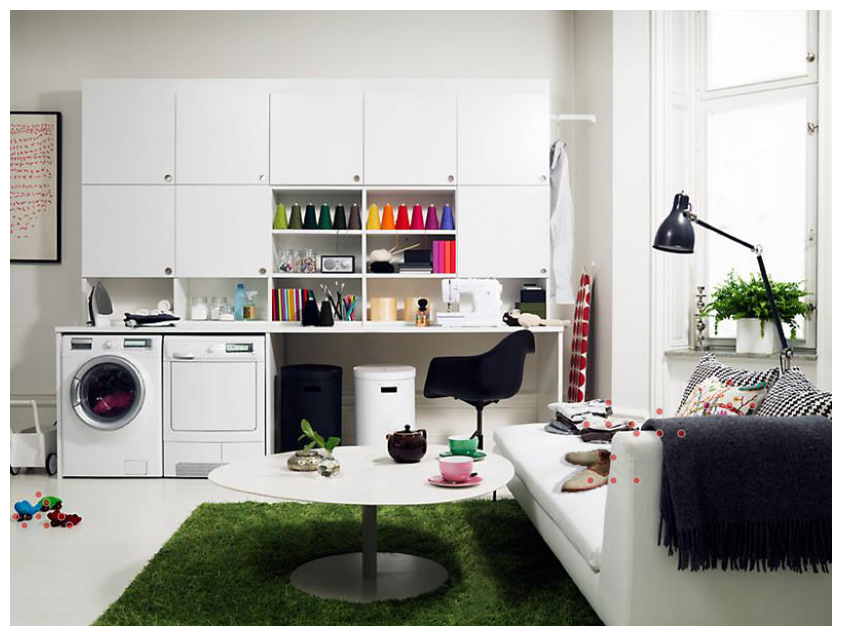

In [9]:

img_data.draw_fixations( participant_data, fix_color=stl.COLORS[COLOR_CODE_1][0], fix_edge_color=stl.COLORS[COLOR_CODE_2][1], size = 25 )


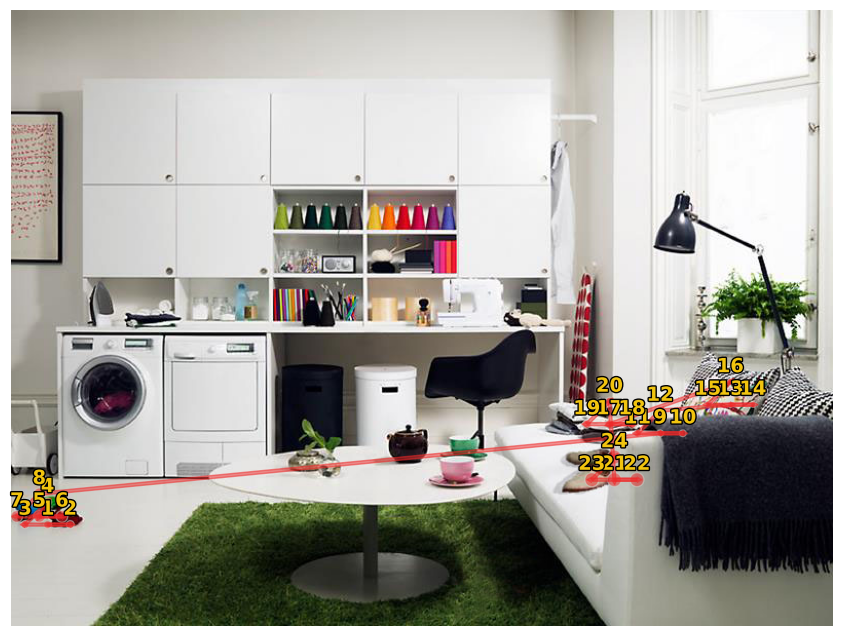

In [10]:
font_color =  "yellow"          
COLOR_CODE_1 =  "fixation_scarletred_lightdark" #"fixation_skyblue_2"
COLOR_CODE_2 = "aluminium"
COLOR_CODE_3 = "yellow"

#img_data.draw_fixations( participant_data, fix_color=stl.COLORS[COLOR_CODE_1][0], fix_edge_color=stl.COLORS[COLOR_CODE_2][1], size = None )
img_data.draw_scanpath( participant_data, fix_color=stl.COLORS[COLOR_CODE_1][0], fix_edge_color=stl.COLORS[COLOR_CODE_2][1], 
                       font_color=stl.COLORS[COLOR_CODE_3][1], size = None, fontsize=14, width=3)


PARTICIPANT:  6


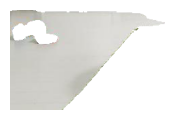

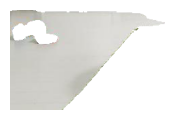

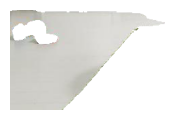

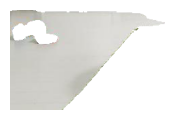

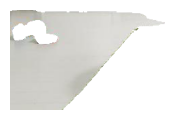

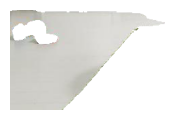

In [12]:
INDX = 0

participants = list(img_data.masks.keys())

for p_id in [participants[INDX]]:
    print("PARTICIPANT: ", p_id)
    for m_indx in range(len(img_data.masks[p_id])):
        img_data.masks[p_id][m_indx].plot(figsize=(2,2)) 

6
PARTICIPANT:  6


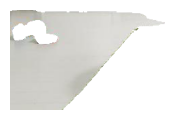

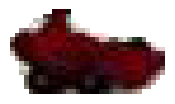

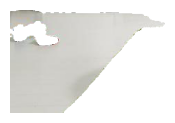

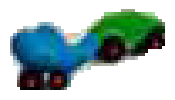

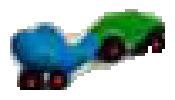

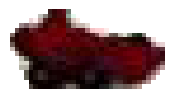

In [11]:
INDX = 0

participants = list(img_data.masks.keys())

print(participants[INDX])

for p_id in [participants[INDX]]:
    print("PARTICIPANT: ", p_id)
    for m_indx in range(len(img_data.masks[p_id])):
        img_data.masks[p_id][m_indx].plot(figsize=(2,2)) 

In [57]:
llava = LLM("ollama", "llama3.2-vision:90b")
user_prompt="Analyze the following image and describe its content in detail. You must identify all objects. Add any relevant insights."

resp, answer, duration = llava.analyse_image(img_data, user_prompt, temperature=0.1)
print("Total_time: ", duration, "sec")
format_llm_answer(answer)